In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
x = np.random.randn(100)

In [4]:
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [7]:
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)

np.add.at(counts, i, 1)

In [8]:
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

In [10]:
import matplotlib.pyplot as plt

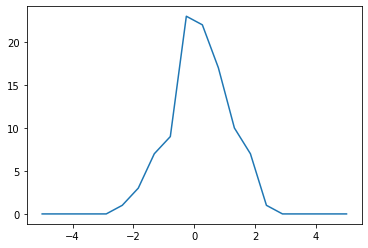

In [18]:
plt.plot(bins, counts, linestyle='solid');

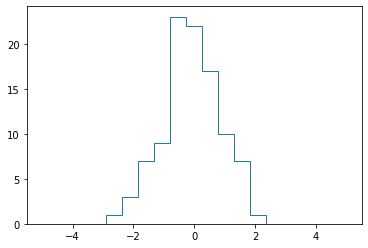

In [20]:
plt.hist(x, bins, histtype='step');

In [21]:
print('NumPy routine:')
%timeit counts, edhes = np.histogram(x, bins)

print('Custom routine:')
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
19.1 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Custom routine:
13 µs ± 261 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [22]:
x = np.random.randn(1000000)

print('NumPy routine:')
%timeit counts, edhes = np.histogram(x, bins)

print('Custom routine:')
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
53.6 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
95.6 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [26]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [27]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [28]:
x

array([1, 2, 3, 4, 5])

In [29]:
x = np.array([1, 4, 5, 1, 4, 8, 5, 3])

In [30]:
bogosort(x)

array([1, 1, 3, 4, 4, 5, 5, 8])

In [37]:
x = np.array([9, 3, 4, 6, 1, 5, 0, 5, 3])

In [38]:
np.argsort(x)

array([6, 4, 1, 8, 2, 5, 7, 3, 0], dtype=int64)

In [39]:
x

array([9, 3, 4, 6, 1, 5, 0, 5, 3])

In [41]:
rand = np.random.RandomState(42)
x = rand.randint(0, 10, (4, 6))
print(x)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [46]:
np.sort(x, axis=0)
np.sort(x, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [52]:
x = np.array([7, 6, 8, 4, 5, 0, 1, 5, 2, 22, 1])

In [53]:
np.partition(x, 3)

array([ 1,  0,  1,  2,  4,  5,  5,  6,  7, 22,  8])

In [54]:
rand = np.random.RandomState(42)
x = rand.randint(0, 10, (4, 6))
print(x)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [55]:
np.partition(x, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [56]:
x = rand.rand(10, 2)

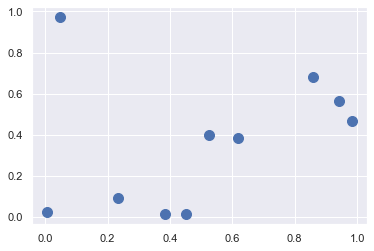

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(x[:, 0], x[:, 1], s=100);

In [61]:
dist_sq = np.sum((x[:, np.newaxis, :] - x[np.newaxis, :, :]) ** 2, axis=-1)

In [62]:
dist_sq

array([[0.        , 0.40999909, 0.90538547, 0.05550496, 0.50287983,
        1.14976739, 1.15936537, 0.19672877, 1.16632222, 0.14319923],
       [0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
        0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585],
       [0.90538547, 0.55794316, 0.        , 0.81458763, 0.67649219,
        1.13419594, 0.74752753, 1.08562368, 0.9704683 , 1.03211241],
       [0.05550496, 0.18090431, 0.81458763, 0.        , 0.23387834,
        0.70468321, 0.74108843, 0.05338715, 0.72671958, 0.0288717 ],
       [0.50287983, 0.00906581, 0.67649219, 0.23387834, 0.        ,
        0.14021843, 0.1470605 , 0.16449241, 0.13755476, 0.18859392],
       [1.14976739, 0.21465798, 1.13419594, 0.70468321, 0.14021843,
        0.        , 0.06080186, 0.48946337, 0.01100053, 0.56059965],
       [1.15936537, 0.19098635, 0.74752753, 0.74108843, 0.1470605 ,
        0.06080186, 0.        , 0.61258786, 0.02046045, 0.66652228],
       [0.19672877, 0.15497331, 1.0856236

In [63]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
n = np.argsort(dist_sq, axis=1)
print(n)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [66]:
k = 2
n_ = np.argpartition(dist_sq, k + 1, axis=1)

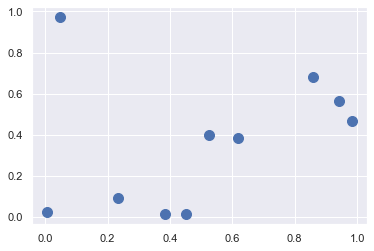

In [67]:
plt.scatter(x[:, 0], x[:, 1], s=100);

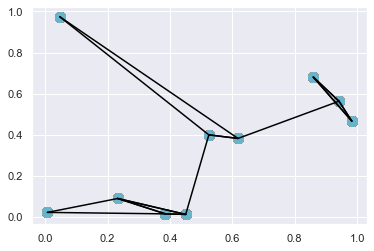

In [69]:
for i in range(x.shape[0]):
    for j in n_[i, :k+1]:
        plt.scatter(x[:, 0], x[:, 1], s=100)
        plt.plot(*zip(x[j], x[i]), color='black')